In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import random
import nltk
import string
from nltk.corpus import stopwords 

import warnings
warnings.simplefilter('ignore')

In [2]:
from gensim import corpora, models, similarities

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk.stem
english_stemmer = nltk.stem.SnowballStemmer('english')
class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedTfidfVectorizer,self).build_analyzer()
        return lambda doc:(english_stemmer.stem(word) for word in analyzer(doc))

In [62]:
import re

def build_tokenizer(doc):
    token_pattern=r"(?u)\b\w\w+\b"
    token_pattern = re.compile(token_pattern)
    return token_pattern.findall(doc)
posts_root1=[]
for post in X_train:
    #print build_tokenizer(post)
    #print " ".join([english_stemmer.stem(word) for word in build_tokenizer(post)])
    posts_root1.append( " ".join([english_stemmer.stem(word) for word in build_tokenizer(post)]) )

print(posts_root1)
#posts_root = [ " ".join(english_stemmer.stem(word)) for doc in posts for word in build_tokenizer(doc)]

vectorizer_tfidf=StemmedTfidfVectorizer(ngram_range=(1, 3),lowercase=False,min_df=1,stop_words="english")



x_tfidf_test=vectorizer_tfidf.fit_transform(posts_root1)

print("feature_name:%s" % vectorizer_tfidf.get_feature_names())


['algorithm use in bb scan', 'what is unsupervis learn', 'what is hierarch cluster', 'impact of bbscan cluster on data set', 'how to perform bbscan unsupervis techniqu', 'how to cluster in data look like', 'type of cluster', 'what is use of unsupervis learn techniqu', 'formula use in mean', 'what is divis cluster', 'effect of bbscan cluster', 'how to perform mean unsupervis method', 'how to perform mean unsupervis techniqu', 'differ way of do unsupervis learn', 'how to do non hierarch cluster', 'nonhierarch cluster', 'way to do non hierarch cluster', 'what is bbscan cluster', 'how to perform bbscan unsupervis method', 'basic of unsupervis learn', 'algorithm use in kmean', 'how to do unsupervis learn', 'field where cluster is use', 'differ type of hierarch cluster', 'formula use in kmean', 'effect of cluster', 'impact of mean cluster on data set', 'use of unsupervis learn', 'learn unsupervis leer', 'use of bb scan cluster', 'way of do unsupervis learn', 'how unsupervis learn is use', 'd

In [61]:
X_train

51                           algorithm used in bb scans
8                       what is unsupervised learnings 
24                      what is hierarchical clustering
3             impact of bbscans clustering on data set 
71        how to perform bbscan unsupervised techniques
13                    how to cluster in data looks like
70                                 types of clustering 
33     What is use of unsupervised learning techniques 
31                              formula used in k means
29                          what is division clustering
56                         effect of bbscans clustering
11            how to perform k mean unsupervised method
75        how to perform k mean unsupervised techniques
63      different ways of doing unsupervised learnings 
50                how to do non hierarchical clustering
66                          nonhierarchical clustering 
5               ways to do non hierarchical clustering 
26                           what is bbscan clus

In [ ]:
question

In [ ]:
question

In [ ]:
tfidf

In [15]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [ ]:
#stats = pd.read_excel('Corpus.xlsx',header=0)

In [5]:

stats=pd.read_csv('statistics_corpus.csv',encoding =  "ISO-8859-1")

In [7]:
stats

,Topic_Code,Sub_Topic_Code,Topic_Name,Question
0,AASKK02,S0001,Data and Histogram,How to Summarizes data (Data and Histogram)
1,AASKK02,S0001,Data and Histogram,What is Univariate Analysis
2,AASKK02,S0001,Data and Histogram,What is Multvariate Analysis
3,AASKK02,S0002,Central Tendency and 3 Ms,What are Central Tendency
4,AASKK02,S0002,Central Tendency and 3 Ms,What are 3Ms
...,...,...,...,...
102,AASKK02,S0020,Exploratory Data analysis,How to define Variables
103,AASKK02,S0021,Data Preprocessing,How to do Encoding of Categorical Data
104,AASKK02,S0021,Data Preprocessing,What are the different kind of Encoding
105,AASKK02,S0021,Data Preprocessing,What is Data Preprocessing


In [8]:
stats

,Topic_Code,Sub_Topic_Code,Topic_Name,Question
0,AASKK02,S0001,Data and Histogram,How to Summarizes data (Data and Histogram)
1,AASKK02,S0001,Data and Histogram,What is Univariate Analysis
2,AASKK02,S0001,Data and Histogram,What is Multvariate Analysis
3,AASKK02,S0002,Central Tendency and 3 Ms,What are Central Tendency
4,AASKK02,S0002,Central Tendency and 3 Ms,What are 3Ms
...,...,...,...,...
102,AASKK02,S0020,Exploratory Data analysis,How to define Variables
103,AASKK02,S0021,Data Preprocessing,How to do Encoding of Categorical Data
104,AASKK02,S0021,Data Preprocessing,What are the different kind of Encoding
105,AASKK02,S0021,Data Preprocessing,What is Data Preprocessing


In [9]:
stats=stats.dropna(subset=["Question"])

In [10]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
stats["Sub_Topic_Code"] = labelEncoder.fit_transform(stats["Sub_Topic_Code"])

In [13]:
stats1.Sub_Topic_Code.value_counts()

17    13
14    10
1     10
6     10
16     9
13     9
2      6
18     5
20     4
15     4
19     4
8      3
0      3
12     3
7      2
9      2
5      2
4      2
3      2
11     2
10     2
Name: Sub_Topic_Code, dtype: int64

In [12]:
stats1=stats.sample(frac=1).reset_index(drop=True)

In [40]:
y=stats1["Sub_Topic_Code"]
X=stats1["Question"]
test_size=0.3
X_train, X_test, y_train, y_test = train_test_split(stats1["Question"], stats1["Sub_Topic_Code"],test_size=0.3, random_state=99)

In [89]:
from nltk.tokenize import word_tokenize
tfidf_vect = TfidfVectorizer(analyzer='word', tokenizer=word_tokenize, token_pattern=None, max_features=5000,max_df=10, stop_words='english', use_idf=True)
tfidf_vect.fit(stats["Question"])
xtrain_tfidf =  tfidf_vect.transform(X_train)
xvalid_tfidf =  tfidf_vect.transform(X_test)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', tokenizer=word_tokenize, token_pattern=None, ngram_range=(2,5), max_features=5000,max_df=10, stop_words='english', use_idf=True)
tfidf_vect_ngram.fit(stats["Question"])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(X_train)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(X_test)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', tokenizer=word_tokenize, token_pattern=None, ngram_range=(2,10), max_features=5000,max_df=10, stop_words='english', use_idf=True)
tfidf_vect_ngram_chars.fit(stats["Question"])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_train) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_test)

<290x576 sparse matrix of type '<class 'numpy.float64'>'
	with 753 stored elements in Compressed Sparse Row format>

In [13]:
# use default options for CountVectorizer
#vect = CountVectorizer()
vect = CountVectorizer(lowercase=False)


# use Naive Bayes to predict the star rating
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_class = nb.predict(X_test)

# calculate accuracy
print (metrics.accuracy_score(y_test, y_pred_class))
print(nb.score(X_test,y_test))

ValueError: could not convert string to float: 'how to merge two python dictionaries in a single expression?'

In [83]:
# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test(vect):
    X_train_dtm = vect.fit_transform(X_train)
    print ('Features: ', X_train_dtm.shape[1])
    X_test_dtm = vect.transform(X_test)
    nb = LogisticRegression()
    nb.fit(X_train_dtm, y_train)
    eli5.show_weights(nb, vec=vect)
    y_pred_class = nb.predict(X_test_dtm)
    print("Training Accuracy")
    print(nb.score(X_train_dtm,y_train))
    print("Testing Accuracy")
    print(nb.score(X_test_dtm,y_test))
    print(classification_report(y_pred_class,y_test))
#The ConfusionMatrix visualizer taxes a model
    cm = ConfusionMatrix(nb, classes=[0,1,2,3,4,5,6,7,8,9])



#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
    cm.score(X_test_dtm, y_test)

#How did we do?
    cm.poof()
    print(confusion_matrix(y_pred_class,y_test))


Features:  342
Training Accuracy
1.0
Testing Accuracy
0.7878787878787878
              precision    recall  f1-score   support

           1       0.67      0.67      0.67         3
           2       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.50      1.00      0.67         2
           7       1.00      1.00      1.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          11       1.00      1.00      1.00         1
          12       0.00      0.00      0.00         0
          13       1.00      0.80      0.89         5
          14       1.00      1.00      1.00         2
          15       1.00      0.33      0.50         3
          16       1.00      0.50      0.67         2
          17       0.80      1.00      0.89         4
        

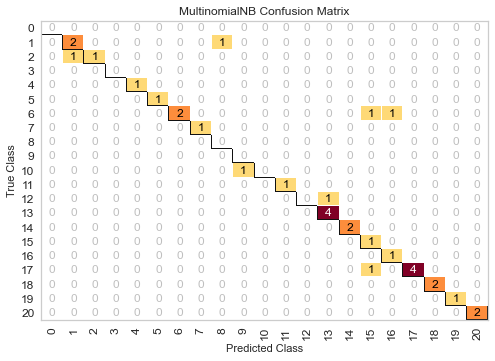

[[2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 4 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]]


In [44]:
#vect = CountVectorizer(ngram_range=(1, 1),lowercase=False)

from yellowbrick.classifier import ConfusionMatrix
tokenize_test(vectorizer_tfidf)

In [75]:
    import eli5
    eli5.show_weights(nb, vec=vect)

NameError: name 'nb' is not defined

In [45]:

python=pd.read_csv('PythonQuestions.csv',encoding =  "ISO-8859-1")

In [60]:
from sklearn.preprocessing import LabelEncoder
unsupervised=pd.read_excel('corpus.xlsx',encoding =  "ISO-8859-1")
unsupervised.columns=["Question","Sub_Topic_Code"]
labelEncoder = LabelEncoder()
unsupervised["Sub_Topic_Code"] = labelEncoder.fit_transform(unsupervised["Sub_Topic_Code"])
unsupervised1=unsupervised.sample(frac=1).reset_index(drop=True)
y=unsupervised1["Sub_Topic_Code"]
X=unsupervised1["Question"]
test_size=0.3
X_train, X_test, y_train, y_test = train_test_split(unsupervised1["Question"], unsupervised1["Sub_Topic_Code"],test_size=0.3, random_state=99)

In [47]:
python1=python.sample(frac=1).reset_index(drop=True)

In [48]:
y=python1["Sub_Topic_Code"]
X=python1["Question"]
test_size=0.3
X_train, X_test, y_train, y_test = train_test_split(python1["Question"], python1["Sub_Topic_Code"],test_size=0.3, random_state=99)

Features:  2081
Training Accuracy
0.9957983193277311
Testing Accuracy
0.5882352941176471
              precision    recall  f1-score   support

           0       0.40      0.67      0.50         3
           1       0.00      0.00      0.00         1
           2       0.75      0.60      0.67        20
           3       0.33      1.00      0.50         1
           5       0.90      0.90      0.90        10
           6       0.67      0.67      0.67         3
           7       0.71      0.45      0.56        11
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         1
          10       0.83      0.56      0.67         9
          11       0.14      0.20      0.17         5
          12       1.00      0.50      0.67         2
          13       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0
          17       1.00      0.62      0.77   

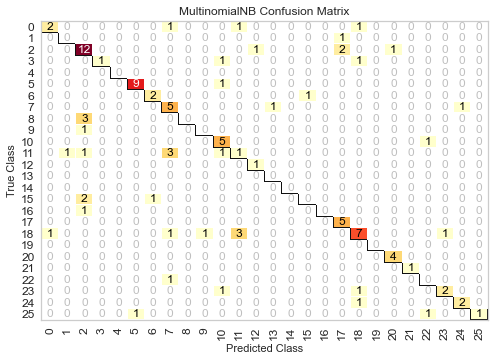

[[ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 12  0  0  0  0  3  1  0  1  0  0  2  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  2  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  5  0  0  0  3  0  0  0  0  0  1  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  1  1  0  0  0  0  5  1  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  3  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [53]:

from yellowbrick.classifier import ConfusionMatrix
tokenize_test(vectorizer_tfidf)

Features:  175
Training Accuracy
0.8275862068965517
Testing Accuracy
0.4230769230769231
              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       1.00      0.21      0.35        14
           7       0.80      1.00      0.89         4
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.42        26
   macro avg       0.48      0.34      0.36        26
weighted avg       0.97      0.42      0.51        26



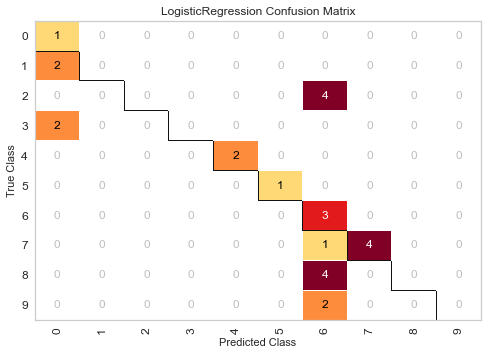

[[1 2 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 4 0 0 0 3 1 4 2]
 [0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [84]:
from yellowbrick.classifier import ConfusionMatrix
tokenize_test(vectorizer_tfidf)

In [ ]:
nb = MultinomialNB()
nb.fit(text, y_train)
y_pred_class = nb.predict(X_test_dtm)

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
vectors_tfidf = vectorizer_tfidf.fit_transform(X_train) # (documents, vocab)

In [ ]:
X_train

In [ ]:
num_top_words=50
vocab = np.array(vect.get_feature_names())

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    print(len(vocab))
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [ ]:
vocab.shape

In [ ]:
vect

In [ ]:
import numpy as np
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt
#vect = CountVectorizer(lowercase=False,stop_words='english')
vectorizer_tfidf = TfidfVectorizer(lowercase=False,stop_words='english')
# create document-term matrices
X_train_dtm = vectorizer_tfidf.fit_transform(X_train)
X_test_dtm = vectorizer_tfidf.transform(X_test)
u, s, v = randomized_svd(X_train_dtm, 25)

In [ ]:
# computes an orthonormal matrix whose range approximates the range of A
# power_iteration_normalizer can be safe_sparse_dot (fast but unstable), LU (imbetween), or QR (slow but most accurate)
def randomized_range_finder(A, size, n_iter=5):
    Q = np.random.normal(size=(A.shape[1], size))
    
    for i in range(n_iter):
        Q, _ = linalg.lu(A @ Q, permute_l=True)
        Q, _ = linalg.lu(A.T @ Q, permute_l=True)
        
    Q, _ = linalg.qr(A @ Q, mode='economic')
    return Q

In [ ]:
def randomized_svd(M, n_components, n_oversamples=10, n_iter=4):
    
    n_random = n_components + n_oversamples
    
    Q = randomized_range_finder(M, n_random, n_iter)
    
    # project M to the (k + p) dimensional space using the basis vectors
    B = Q.T @ M
    
    # compute the SVD on the thin matrix: (k + p) wide
    Uhat, s, V = linalg.svd(B, full_matrices=False)
    del B
    U = Q @ Uhat
    
    return U[:, :n_components], s[:n_components], V[:n_components, :]

In [ ]:
u

In [ ]:
v

In [ ]:
print (len(vect.get_feature_names()[:]))

In [ ]:
show_topics(v)

In [ ]:
U

In [ ]:
clf = decomposition.NMF(n_components=5, random_state=1)

W1 = clf.fit_transform(X_train_dtm)
H1 = clf.components_

In [ ]:
show_topics(H1)

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=25, random_state=42)
data = svd.fit_transform(X_train_dtm) 

In [ ]:
X_all=X[:] # as no need to split data here
# y=final['Score'][:]
# X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.30, random_state=42)
tfidf = TfidfVectorizer()
X_all_tfidf=tfidf.fit_transform(X_all)
# X_test_tfidf=tfidf.transform(X_test)
tfidf_features=tfidf.get_feature_names()
indices=np.argsort(tfidf.idf_[::-1])
top_indices=indices[0:2000]
top_features=[tfidf_features[i] for i in indices[0:2000]]
# top_tfidf=[tfidf_features[i] for i in indices[0:2000]]
top_n=np.argsort(top_features[::-1])
k_values=np.arange(2,150,3)
indices[:9] #just printing for self reference

In [ ]:
variance=[]
# X=sparse.csr_matrix(top_features)
for k in k_values:
    svd=TruncatedSVD(n_components=k)
    svd.fit_transform(X_train_dtm)

    score=svd.explained_variance_ratio_.sum()
    variance.append(score)
plt.plot(k_values, variance)
plt.xlabel('n_components')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
errors=[]
k_value=[2,7, 13,  17, 25 , 30, 40, 50,75,100,125,232]
for i in k_value:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_train_dtm)
    
    errors.append(kmeans.inertia_)
plt.plot(k_value, errors)
plt.show()

In [ ]:
    tsv = TruncatedSVD(n_components=100,algorithm='randomized')
    tfv = TfidfVectorizer(min_df=3,max_features=None,strip_accents='unicode',analyzer='word',token_pattern=r'\w{1,}',ngram_range=(1, 2), use_idf=1,smooth_idf=1,sublinear_tf=1)
    tfv.fit(X_train)
    text = tfv.transform(X_train)
    text = tsv.fit_transform(text)

In [ ]:
y_test

In [ ]:
score=tsv.explained_variance_ratio_.sum()

In [ ]:
text

In [90]:
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer
vectorizer = TfidfVectorizer(max_df=10, stop_words='english', use_idf=True)
#vectorizer = TfidfVectorizer(min_df=3,max_features=None,strip_accents='unicode',analyzer='word',ngram_range=(1, 2), use_idf=1,smooth_idf=1,sublinear_tf=1)
3#lsa = NMF(n_components=200)
mnb = LogisticRegression()


#train_text = vectorizer_tfidf.fit_transform(X_train)
#test_text = vectorizer_tfidf.fit_transform(X_test)
train_text = Normalizer(copy=False).fit_transform(xtrain_tfidf_ngram)
test_text = Normalizer(copy=False).transform(xvalid_tfidf_ngram)
mnb.fit(train_text, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
y_pred_class = mnb.predict(xvalid_tfidf_ngram)

In [16]:
x_tfidf

<415x453 sparse matrix of type '<class 'numpy.float64'>'
	with 1531 stored elements in Compressed Sparse Row format>

In [18]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100)

In [92]:
    print("Training Accuracy")
    print(mnb.score(train_text,y_train))
    print(mnb.score(test_text,y_test))
    print(classification_report(y_pred_class,y_test))
    print(confusion_matrix(y_pred_class,y_test))

Training Accuracy
0.25862068965517243
0.11538461538461539
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       1.00      0.12      0.21        26
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.12        26
   macro avg       0.10      0.01      0.02        26
weighted avg       1.00      0.12      0.21        26

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 2 4 2 2 1 3 5 4 2]
 [0 0 0 0 0 0 0 0 0 0]

In [82]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier,BaggingClassifier
dt_full=DecisionTreeClassifier(criterion='entropy',random_state=0)#fully grown tree (high bias error and var error)
bg = BaggingClassifier(base_estimator=dt_full,random_state=0,)
rf = RandomForestClassifier(n_estimators=200,criterion='entropy',random_state=200)
ab = AdaBoostClassifier(n_estimators=51,random_state=10)
gb = GradientBoostingClassifier(n_estimators=50,random_state=10)  
rf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=10, oob_score=False, random_state=999,
                       verbose=0, warm_start=False) 

In [31]:
stats1=stats1[stats1["Sub_Topic_Code"]!=1]

In [94]:
import eli5
eli5.show_weights(mnb, vec=tfidf_vect_ngram)

In [ ]:
def fit_algo(algorithm,X_train1,y_train1,X_test1,y_test1):
    import time
    clf_problem = algorithm in clf_names
    model = models[algorithm]
    training_start = time.perf_counter()
    model.fit(X_train1, y_train1)
    training_end = time.perf_counter()
    prediction_start = time.perf_counter()
    preds = model.predict(X_test_scaled1)
    prediction_end = time.perf_counter()
    return(preds)

In [42]:
stats1[stats1.Sub_Topic_Code==3]

,Topic_Code,Sub_Topic_Code,Question
276,AASKK278,3,how to slice a dataframe?
252,AASKK254,3,How to use np.nan in pandas dataframe?
247,AASKK249,3,How to mask dataframe based on index value?
285,AASKK287,3,How to get unique values from the columns?
225,AASKK227,3,Get particular row as series from pandas dataf...
...,...,...,...
224,AASKK226,3,pandas merge columns to a single time series
246,AASKK248,3,How to mask based on column name?
267,AASKK269,3,What is to_numeric conversion in pandas?
334,AASKK336,3,What is the purpose of astype in pandas?
